# A Machine Learning Model to Predict Customer Churn

![Project Image]("C:\Users\pasca\OneDrive\Desktop\PaccyDEM\LP2_Machine_Learning_Project\1_VhF3Ibprkk9DsMAyQZ20eg.jpg")

'[Project' is not recognized as an internal or external command,
operable program or batch file.


## **Project Description**
The goal of this project is to develop a supervised machine learning model to analyze customer attrition within the Vodafone telecom company. The model will utilize any provided dataset to generate new observations by accurately determining whether a customer is likely to churn or not. This initiative aims to provide valuable insights into customer behavior, enabling the identification of potential churn and facilitating strategic interventions to retain customers effectively. The outcome of the project will contribute to a more informed and proactive approach to customer relationship management within Vodafone.

#### The data set includes information about:

* Customers who left within the company  — the column is called Churn.
* Services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information — how long they’ve been a customer (Tenure ), contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers — gender, age range, and if they have partners and dependents
Demographics
CustomerID: A unique ID that identifies each customer.
* Senior Citizen: Indicates if the customer is older: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* Tenure in Months: Indicates the total amount of months that the customer has been with the company 
* total charges is  equal to each tenue times monthly charges.
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

## **Hypothesis Testing**




**Null Hypothesis (H0):**
- H0: There is no significant relationship between customer churn and the type of contract.

**Alternative Hypothesis (H1):**
- H1: There is a significant relationship between customer churn and the type of contract.








## **Analytical Questions**
1. What is the overall count of customers who have discontinued their services with the company?

2. Which contract type exhibits a higher number of customers who have left the company?

3. How does the rate of customer churn change in relation to the duration of their subscription? (Visualized with a line chart)

4. Is there a correlation between the total charges accrued by customers and the type of contract they have? (Visualized with a bar chart)
5. What are the preferred payment methods?

### Step1: Import Libraries

#### Import Libraries

In [1]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

warnings.filterwarnings('ignore')

### Step2: Data Loading
The data for this project is divided into three parts

#### First Data set 

The first dataset is stored in ä Mcrosoft Sql Server . I will  connect to it remotely by using the  **pyodbc** library .






In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [4]:
# Use the connect method of the pyodbc library and connect to the server . 


connection = pyodbc.connect(connection_string)

In [5]:
# The sql query to get the data 

query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

data1 = pd.read_sql(query, connection)

In [6]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


###  Second Dataset

* The second dataset for this project was found on OneDrive and is in CSV format.
* This dataset will serve as the test dataset.

In [7]:
data2 = pd.read_csv(r"C:\Users\pasca\OneDrive\Desktop\PaccyDEM\LP2_Machine_Learning_Project\Telco-churn-second-2000.csv")

In [8]:
data2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


### Third Dataset 
The third dataset is also called Testing Data set will used to test my models

In [9]:
testing_data = pd.read_csv(r"C:\Users\pasca\OneDrive\Desktop\PaccyDEM\LP2_Machine_Learning_Project\LP2_Telco-churn-last-2000.csv")

In [10]:
testing_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


## Step3 : Data Inspecting 

### Data1

In [11]:
data1.head()             # Displaying the first few rows of the DataFrame 'data1' to inspect the data structure



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
data1.shape         # Checking the dimensions (number of rows and columns) of the DataFrame 'data1'



(3000, 21)

In [13]:
data1.info()             # Displaying concise information about the DataFrame 'data1', including data types and non-null values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


##### Check for null values

In [51]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

###  Calculate and display the percentage of null values for each column in 'data1'


In [74]:
# Calculate the percentage of null values for each column in 'data1'
null_percentages = (data1.isnull().sum() / len(data1)) * 100

# Display the result
print("Percentage of null values for each column in 'data1':")
print(null_percentages)


Percentage of null values for each column in 'data1':
customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.166667
Churn                0.033333
dtype: float64


#### Check for duplicate 

In [157]:
data1.duplicated().sum()  # No duplicates were found.


0

In [76]:
data1.describe().T  # Generate descriptive statistics for numerical columns in 'data1' and transpose the result


,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


## Inspecting Column by column 
 however, only a subset of columns is presented for the sake of time constraints.


In [34]:
data1["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [37]:

result = data1[data1['tenure'] == 0]  # 0 means the customer has been with the company for less than one mont
result                                 #  This is due to the representation of tenure in months.



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,NaN,False
753,3115-CZMZD,Male,False,False,True,0,True,False,No,None,...,None,None,None,None,Two year,False,Mailed check,20.250000,NaN,False
936,5709-LVOEQ,Female,False,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,NaN,False
1082,4367-NUYAO,Male,False,True,True,0,True,True,No,None,...,None,None,None,None,Two year,False,Mailed check,25.750000,NaN,False
1340,1371-DWPAZ,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,NaN,False


In [38]:
data1["PhoneService"].unique()

array([False,  True])

In [40]:
data1["MultipleLines"].unique()

array([None, False, True], dtype=object)

In [44]:
multuplelines_null_count = data1["MultipleLines"].isnull().sum()             # # Count the number of null values in the 'MultipleLines' column

multuplelines_null_count


269

In [45]:
data1["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [48]:
internet_service_count = data1['InternetService'].eq('No').sum()
internet_service_count

651

In [50]:
data1["OnlineSecurity"].unique()

array([False, True, None], dtype=object)

In [59]:
data1["StreamingMovies"].unique()

array([False, True, None], dtype=object)

In [60]:
data1["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [61]:
data1.Contract.value_counts()      ## Count the occurrences of each unique value in the 'Contract' column and display the result


Contract
Month-to-month    1641
Two year           746
One year           613
Name: count, dtype: int64

In [64]:
data1["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [65]:
data1.PaymentMethod.value_counts()            ## Count the occurrences of each unique value in the 'paymentmethod' column and display the result

PaymentMethod
Electronic check             1004
Bank transfer (automatic)     687
Credit card (automatic)       657
Mailed check                  652
Name: count, dtype: int64

In [66]:
data1["MonthlyCharges"].unique()

array([29.85000038, 56.95000076, 53.84999847, ..., 33.90000153,
       34.        , 38.59999847])

In [68]:
data_Montlycharges = data1[data1["MonthlyCharges"]==34.] 
data_Montlycharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2992,4177-JPDFU,Male,False,False,False,12,False,None,DSL,False,...,False,True,False,False,Month-to-month,False,Mailed check,34.0,442.450012,False


In [69]:
data1["TotalCharges"].unique()

array([  29.85000038, 1889.5       ,  108.15000153, ..., 6143.14990234,
        144.80000305,  414.95001221])

In [70]:
data1["Churn"].unique() 

array([False, True, None], dtype=object)

In [73]:
data1["Churn"].isnull().sum()

1

In [72]:
data1.Churn.value_counts()

Churn
False    2219
True      780
Name: count, dtype: int64

## Data2

In [236]:
data2.head()           # Display the first 15 rows of the 'data2' DataFrame for a quick overview of the data.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [78]:
data2.shape             # Output the dimensions (number of rows and columns) of the 'data2' DataFrame.


(2000, 20)

In [18]:
data2.info()                   # Display concise information about the 'data2' DataFrame, including data types and non-null counts.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


#### Check for null values 

In [80]:
data2.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

#### check for duplicate 

In [85]:
data2.duplicated().sum()

0

In [88]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2000.0,0.161500,0.368084,0.00,0.00,0.0,0.000,1.00
tenure,2000.0,31.853000,24.632677,0.00,8.00,27.0,55.000,72.00
MonthlyCharges,2000.0,63.933325,30.136858,18.25,34.25,69.8,89.275,118.75


### Inspecting column by column 

In [158]:
data2["SeniorCitizen"].unique()             # Display unique values in the 'SeniorCitizen' column. I infer that 0 implies 'False' and 
                                            # 1 implies 'True' based on data1 and relevant literature.

array([0, 1], dtype=int64)

In [100]:
data2["tenure"].unique() 

array([12,  9, 27,  1, 24, 14, 32, 11, 38, 54, 29, 44, 59,  3, 18, 67, 22,
       33,  5,  2, 72, 16,  8, 23, 50, 17, 68, 25, 71, 46, 48, 61, 37, 65,
       49, 64, 21, 10,  6, 51, 47, 52, 35, 45,  4, 60, 28, 39, 30, 55, 58,
       26, 43, 56, 36, 13, 70, 69, 41, 15, 19, 31, 34, 66, 40,  7, 53, 63,
       42,  0, 57, 62, 20], dtype=int64)

In [101]:

result = data2[data2['tenure'] == 0]  # 0 means the customer has been with the company for less than one mont
result                                 #  This is due to the representation of tenure in months.



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
1380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,


In [103]:
data2["MultipleLines"].unique() 

array(['Yes', 'No', 'No phone service'], dtype=object)

In [107]:

count_no_phone_service = data2['MultipleLines'].eq("No phone service").sum()

count_no_phone_service

193

In [109]:
data2.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55


In [110]:
data2["InternetService"].unique() 

array(['Fiber optic', 'No', 'DSL'], dtype=object)

In [111]:
data2["OnlineSecurity"].unique() 

array(['No', 'No internet service', 'Yes'], dtype=object)

In [113]:

count_no_internet_service = data2['OnlineSecurity'].eq("No internet service").sum()

count_no_internet_service

446

In [114]:
data2["OnlineBackup"].unique() 

array(['No', 'No internet service', 'Yes'], dtype=object)

In [120]:
data2["StreamingMovies"].unique() 

array(['No', 'No internet service', 'Yes'], dtype=object)

In [121]:
data2["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [122]:
data2.Contract.value_counts()

Contract
Month-to-month    1131
Two year           451
One year           418
Name: count, dtype: int64

In [125]:
data2["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [126]:
data2.PaymentMethod.value_counts()

PaymentMethod
Electronic check             665
Mailed check                 484
Credit card (automatic)      432
Bank transfer (automatic)    419
Name: count, dtype: int64

In [127]:
data2["MonthlyCharges"].unique()

array([ 84.45,  20.4 ,  81.7 ,  79.5 ,  89.15,  20.3 ,  74.95,  74.4 ,
        20.  ,  25.  ,  80.45,  19.75,  65.65,  71.  ,  89.2 ,  86.75,
        55.3 ,  61.5 ,  25.1 ,  55.15,  34.05,  19.95,  89.7 ,  26.3 ,
        84.95,  20.7 ,  43.25,  48.35,  79.55,  71.05,  19.45, 110.8 ,
        84.5 ,  69.3 ,  49.35,  20.35, 105.6 ,  64.45, 108.6 ,  49.9 ,
        30.3 ,  30.4 ,  45.4 , 103.3 ,  84.15,  44.45,  85.4 ,  89.9 ,
        55.05, 104.1 , 106.6 ,  75.2 ,  70.5 ,  19.6 ,  55.85,  24.05,
        38.1 , 106.4 ,  34.25, 100.05,  68.65,  45.8 ,  75.75,  84.4 ,
        96.4 ,  20.55,  50.95,  90.5 ,  79.4 ,  58.75,  59.45, 105.7 ,
        56.25,  53.3 ,  85.55,  24.3 ,  77.85,  59.9 ,  23.95,  20.15,
       105.35,  95.65,  87.05,  81.  ,  82.45,  53.5 ,  20.5 ,  54.4 ,
        58.6 ,  84.8 ,  61.4 ,  79.65,  94.45,  79.8 ,  54.2 ,  74.05,
        49.15,  19.4 , 113.65, 106.  ,  25.95,  19.1 , 103.4 , 100.55,
        95.4 ,  75.15, 107.9 ,  19.5 ,  85.95,  24.95,  59.4 ,  69.95,
      

In [128]:
data2["TotalCharges"].unique()

array(['1059.55', '181.8', '2212.55', ..., '552.95', '7053.35', '301.55'],
      dtype=object)

### Data 3

In [130]:
testing_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [131]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [133]:
testing_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [134]:
testing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


In [135]:
testing_data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No


In [159]:
testing_data["tenure"].unique()

array([ 6, 19, 69, 11, 64, 39, 15, 25, 66, 61, 43, 12, 23, 71, 34,  5, 41,
       72, 14,  1, 10,  7,  9, 48, 20, 16,  2, 22, 35, 54, 56, 18, 68, 53,
       30, 36, 55, 21, 33, 44,  4, 49, 42, 67, 40, 45, 57,  8, 65,  3, 17,
       28, 52, 47, 50, 46, 29, 27, 13, 24, 62, 26, 60, 51, 70, 59, 38, 37,
        0, 58, 31, 32, 63], dtype=int64)

In [160]:
testing_data[testing_data["tenure"]==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
1670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


### Issues Report for  Dataset:
### Data1

1. Missing Values:
   - The 'MultipleLines' column contains 8.97% null values.
   - The 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', and 'StreamingMovies' columns each have 21.70% null values.
   - The 'TotalCharges' column has 0.166667% null values, and 'Churn' has 0.033% null values.

2. Total Charges Calculation:
   - The calculation of the 'TotalCharges' column as the product of 'tenure' and 'monthly charges' is inconsistent.
   - In cases where 'tenure' is 0 (indicating new clients), 'TotalCharges' should be equal to 'MonthlyCharges' instead of having null values.


### Data2
1.  The calculation of the 'TotalCharges' column as the product of 'tenure' and 'monthly charges' is inconsistent.
2. In cases where 'tenure' is 0 (indicating new clients), 'TotalCharges' should be equal to 'MonthlyCharges' instead of being empty.
3. The 'TotalCharges' column is currently of object type instead of being represented as a float.

### Data3

1.  The calculation of the 'TotalCharges' column as the product of 'tenure' and 'monthly charges' is inconsistent.
2. In cases where 'tenure' is 0 (indicating new clients), 'TotalCharges' should be equal to 'MonthlyCharges' instead of being empty.
3. The 'TotalCharges' column is currently of object type instead of being represented as a float.

## Data Cleaning/Preparation

### Data1


In [162]:
data1.TotalCharges.dtype

dtype('float64')

###  First thing first, we should copy our original dataset:



In [165]:
df1= data1.copy()
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


###  Give None value to all rows of Totalcharges column (I will recalculate it later)

In [167]:
df1.TotalCharges = None
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,None,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,None,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,None,True


### Use numpy.where to conditionally assign values to 'TotalCharges' based on 'tenure' in df1 



In [174]:
df1['TotalCharges'] = np.where(df1['tenure'] == 0, df1['MonthlyCharges'], df1['tenure'] * df1['MonthlyCharges'])
df1.head(3)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1936.300026,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,107.699997,True


###  Verifying the application of the formula when 'tenure' is equal to 0.


In [187]:
 tenure_zeo =df1[df1['tenure'] == 0]
 tenure_zeo  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,False,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,52.549999,False
753,3115-CZMZD,Male,False,False,True,0,True,False,No,False,...,False,False,False,True,Two year,False,Mailed check,20.250000,20.250000,False
936,5709-LVOEQ,Female,False,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,80.849998,False
1082,4367-NUYAO,Male,False,True,True,0,True,True,No,False,...,False,False,False,True,Two year,False,Mailed check,25.750000,25.750000,False
1340,1371-DWPAZ,Female,False,True,True,0,False,False,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,56.049999,False


**Handling missing**

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [178]:
df1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 1
dtype: int64

In [179]:


# Assuming df1 is your DataFrame
# Identify the categorical columns with missing values
categorical_columns = ["MultipleLines",  "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","Churn"]

# Impute missing values with the mode for each categorical column
for column in categorical_columns:
    df1[column].fillna(df1[column].mode()[0], inplace=True)


In [180]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data2

In [183]:
df2 = data2.copy()

### Cleaning 1: The data type of “TotalCharges” should be the float64 type instead of the object type
Action: Give None value to all rows, then convert it to the data type of float64. (I will recalculate it later)



In [184]:
df2.TotalCharges = None
df2.TotalCharges=df2.TotalCharges.astype(float)


In [185]:
## Test the results:

df2.TotalCharges.dtype

dtype('float64')

In [186]:
df2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,NaN
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,NaN


### Use numpy.where to conditionally assign values to 'TotalCharges' based on 'tenure' in df2

In [192]:
df2['TotalCharges'] = np.where(df2['tenure'] == 0, df2['MonthlyCharges'], df2['tenure'] * df2['MonthlyCharges'])
df2.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1013.4
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,183.6
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2205.9


###  Verifying the application of the formula when 'tenure' is equal to 0.

In [189]:
 tenure_zeo =df2[df2['tenure'] == 0]
 tenure_zeo 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85
826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35
1380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00


### testing_data

In [190]:
testing_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [191]:
df3 = testing_data.copy()

In [193]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


### Cleaning 1: The data type of “TotalCharges” should be the float64 type instead of the object type
Action: Give None value to all rows, then convert it to the data type of float64. (I will recalculate it later)



In [194]:
df3.TotalCharges = None
df3.TotalCharges=df3.TotalCharges.astype(float)


In [195]:
## Test the results:

df3.TotalCharges.dtype

dtype('float64')

### Use numpy.where to conditionally assign values to 'TotalCharges' based on 'tenure' in df3

In [196]:
df3['TotalCharges'] = np.where(df3['tenure'] == 0, df3['MonthlyCharges'], df3['tenure'] * df3['MonthlyCharges'])
df3.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,297.00,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1045.00,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,3032.55,No


###  Verifying the application of the formula when 'tenure' is equal to 0.

In [197]:
 tenure_zeo =df3[df3['tenure'] == 0]
 tenure_zeo

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
1670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No
1754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.90,No


### The final step of the cleaning process: save the data.

# store the clean data


Df1

In [198]:
Train_data = df1.copy()

In [199]:
Train_data.reset_index(drop=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1936.300026,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,107.699997,True
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1903.499966,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,141.399994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1090.799973,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6206.549789,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,149.500000,False


In [200]:
Train_data.to_csv('Vodafone-Customer-Churn_Train.csv')

### df2

In [201]:
Evaluate_data = df2.copy()

In [202]:
Evaluate_data.reset_index(drop=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1013.40
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,183.60
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2205.90
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2146.50
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,525.70
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3480.35
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,89.40
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,6866.50


In [203]:
Evaluate_data.to_csv('Vodafone-Customer-Churn_Evaluate.csv')

### D3

In [204]:
testing_clean_data = df3.copy()

In [205]:
testing_clean_data.reset_index(drop=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,297.00,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1045.00,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,3032.55,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,817.85,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,7113.60,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,2035.20,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7430.40,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,325.60,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,297.60,Yes


In [206]:
testing_clean_data.to_csv('Vodafone-Customer-Churn_Testing.csv')


### Conduct exploratory data analysis to answer the questions and create visualizations,  will be done only on the training data.


### Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

#### 1. What is the overall count of customers who have discontinued their services with the company?

In [212]:
churn_count = Train_data['Churn'].value_counts()[True]


churn_count

780

In [213]:
churn_count = Train_data["Churn"].sum()
churn_count                                     #Here, sum() on a boolean Series will sum up the True values, effectively giving you the count of True values (assuming True represents customers who have discontinued their services).


780

The overall count of customers who have discontinued their services: 780


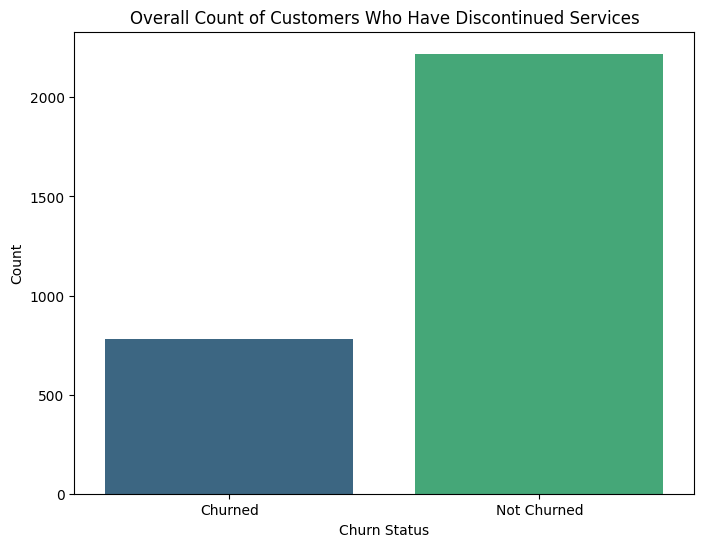

In [214]:


# Assuming your data is in a DataFrame named 'Train_data'
# Assuming your 'Churn' column contains boolean values

# Calculate churn count
churn_count = Train_data["Churn"].sum()

# Print the count
print(f"The overall count of customers who have discontinued their services: {churn_count}")

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=["Churned", "Not Churned"], y=[churn_count, len(Train_data) - churn_count], palette="viridis")
plt.title("Overall Count of Customers Who Have Discontinued Services")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.show()


4. Is there a correlation between the total charges accrued by customers and the type of contract they have? (Visualized with a bar chart)

In [223]:
# Assuming your columns are named 'TotalCharges' and 'Contract'
correlation_df = Train_data.groupby('Contract')['TotalCharges'].mean()


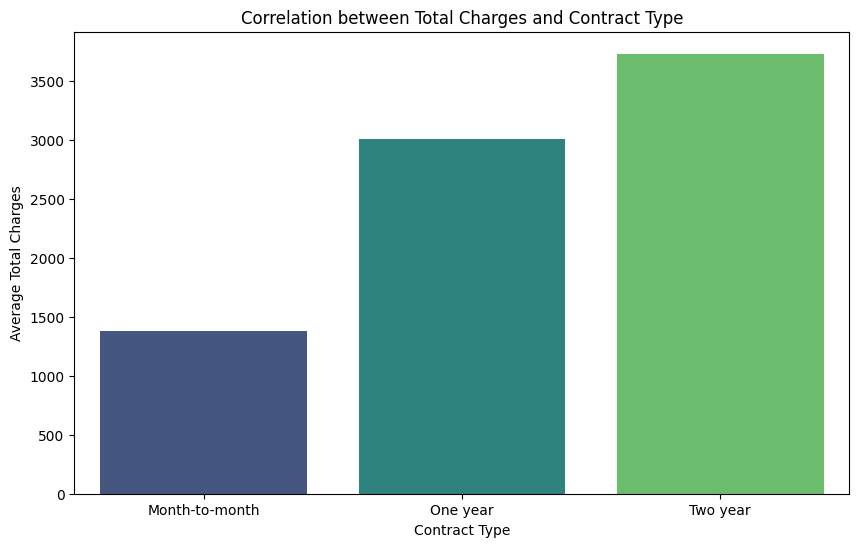

In [224]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df.index, y=correlation_df.values, palette='viridis')
plt.title("Correlation between Total Charges and Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Average Total Charges")
plt.show()



### 5. What are the preferred payment methods?

In [225]:
# Assuming your payment method column is named 'PaymentMethod'
preferred_payment_methods = Train_data['PaymentMethod'].value_counts()


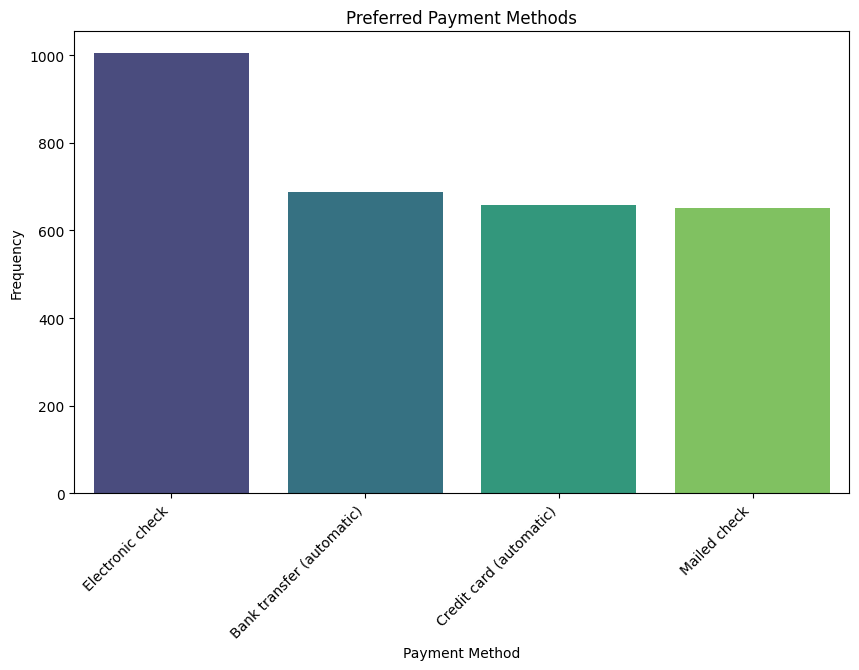

In [226]:
plt.figure(figsize=(10, 6))
sns.barplot(x=preferred_payment_methods.index, y=preferred_payment_methods.values, palette='viridis')
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()


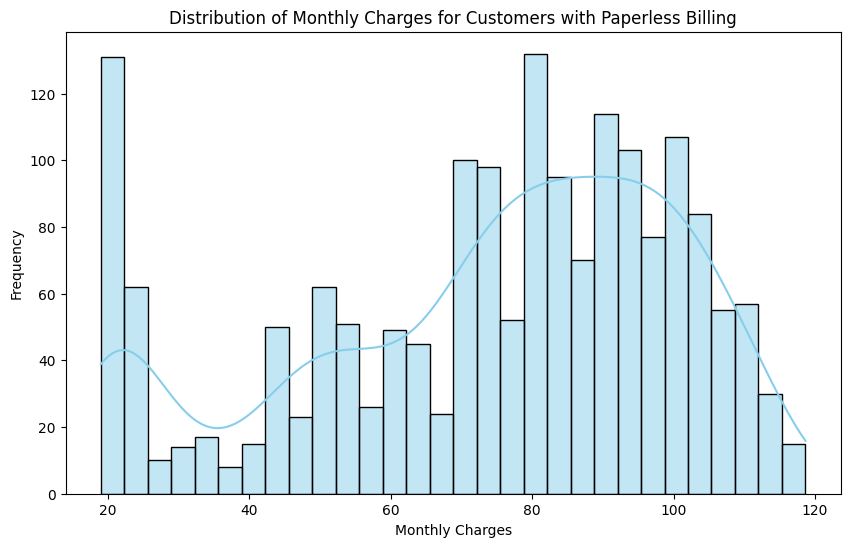

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'df'
# Filter data for customers with paperless billing
paperless_billing_data = Train_data[Train_data['PaperlessBilling']]

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(paperless_billing_data['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Monthly Charges for Customers with Paperless Billing")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()


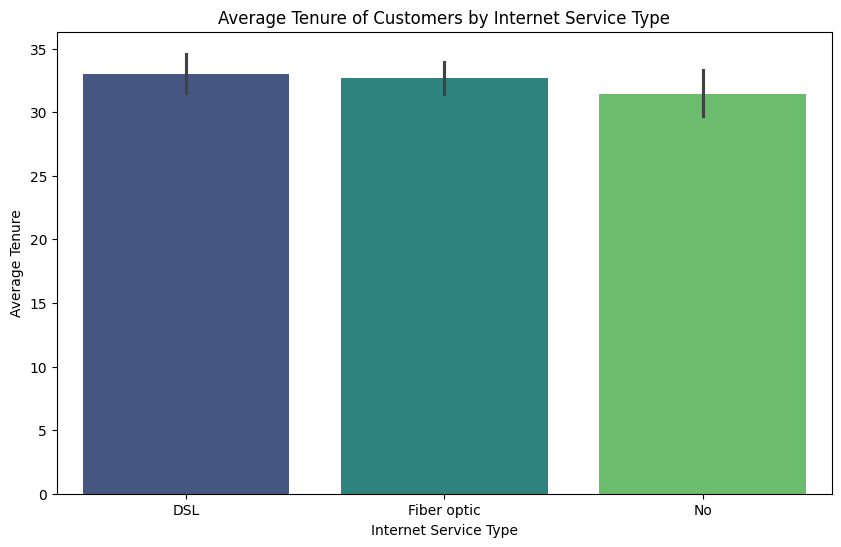

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'df'
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='InternetService', y='tenure', data=Train_data, palette='viridis')
plt.title("Average Tenure of Customers by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Average Tenure")
plt.show()


### Bivariate analysis

In [216]:
# Assuming your contract type column is named 'Contract' and 'Churn' is a boolean column
contract_churn_counts = Train_data.groupby('Contract')['Churn'].sum()
contract_churn_counts

Contract
Month-to-month    701
One year           69
Two year           10
Name: Churn, dtype: int64

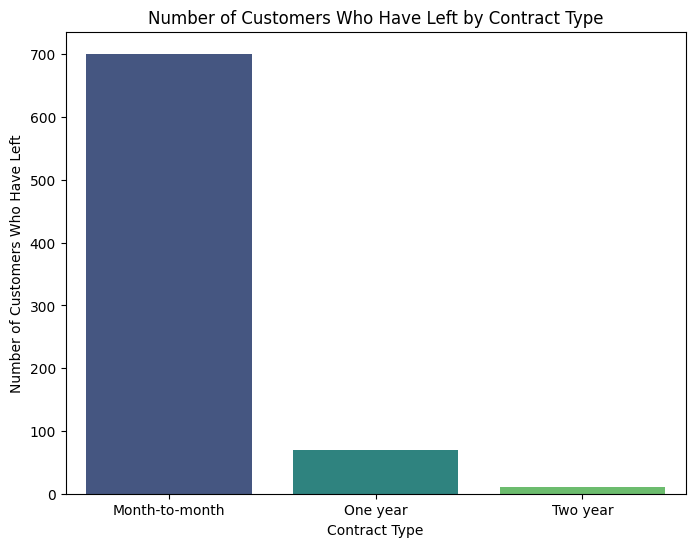

In [217]:
plt.figure(figsize=(8, 6))
sns.barplot(x=contract_churn_counts.index, y=contract_churn_counts.values, palette="viridis")
plt.title("Number of Customers Who Have Left by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers Who Have Left")
plt.show()


In [220]:
# Assuming your columns are named 'Churn' (boolean) and 'tenure' (subscription duration)
churn_rate_by_tenure = Train_data.groupby('tenure')['Churn'].mean()
churn_rate_by_tenure


tenure
0     0.000000
1     0.587549
2     0.560748
3     0.364706
4     0.478873
        ...   
68    0.078947
69    0.100000
70    0.071429
71    0.012500
72    0.000000
Name: Churn, Length: 73, dtype: float64

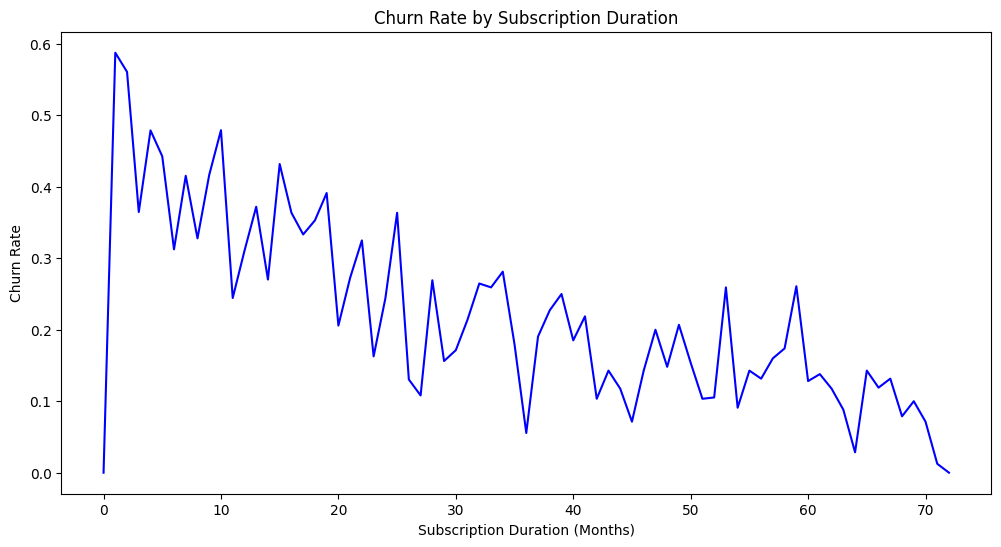

In [221]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values, color='blue')
plt.title("Churn Rate by Subscription Duration")
plt.xlabel("Subscription Duration (Months)")
plt.ylabel("Churn Rate")
plt.show()


In [222]:
print("Churn Rate by Subscription Duration:")
print(churn_rate_by_tenure)


Churn Rate by Subscription Duration:
tenure
0     0.000000
1     0.587549
2     0.560748
3     0.364706
4     0.478873
        ...   
68    0.078947
69    0.100000
70    0.071429
71    0.012500
72    0.000000
Name: Churn, Length: 73, dtype: float64


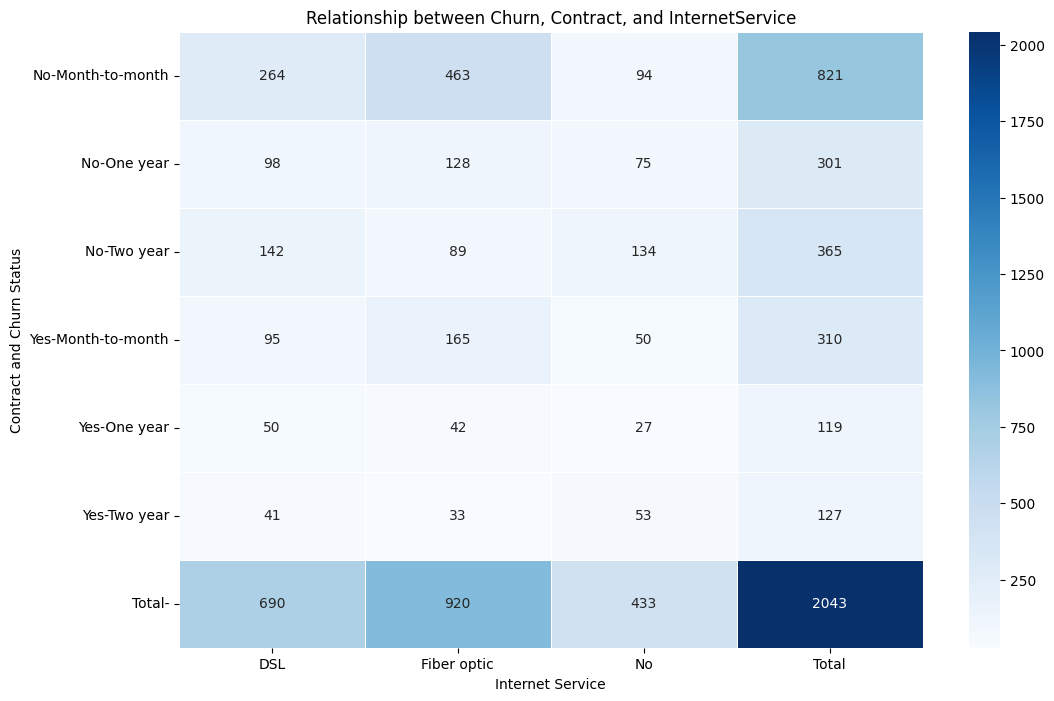

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'df'
# Create a cross-tabulation
cross_tab = pd.crosstab(index=[testing_data['Churn'], Train_data['Contract']], columns=Train_data['InternetService'], margins=True, margins_name="Total")

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap="Blues", fmt="d", cbar=True, linewidths=.5)
plt.title("Relationship between Churn, Contract, and InternetService")
plt.xlabel("Internet Service")
plt.ylabel("Contract and Churn Status")
plt.show()


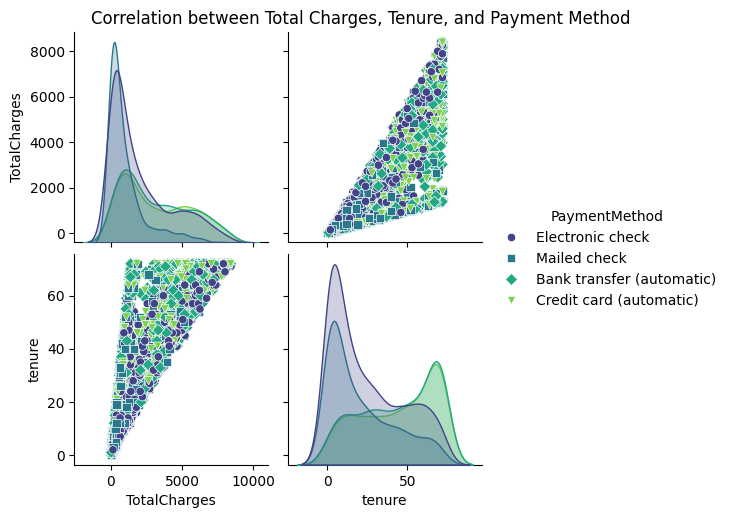

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
# Create a scatter plot matrix
scatter_matrix = sns.pairplot(Train_data, vars=["TotalCharges", "tenure"], hue="PaymentMethod", markers=["o", "s", "D", "v"], palette="viridis")

# Add title
scatter_matrix.fig.suptitle("Correlation between Total Charges, Tenure, and Payment Method", y=1.02)

# Show the plot
plt.show()


To test the hypothesis you've formulated, you can perform a statistical test, such as the Chi-Square Test for Independence. This test is commonly used when you want to determine if there is a significant association between two categorical variables. In your case, the categorical variables are "customer churn" and "termination of contract."

Here's a step-by-step guide on how to perform a Chi-Square Test for Independence in Python:These hypotheses articulate the idea that, in the population, there is no association between customer churn and the type of contract (Null Hypothesis), and the alternative hypothesis suggests that there is a significant association.

You can use the provided code to perform the Chi-Square Test for Independence on your data and assess whether you reject the null hypothesis in favor of the alternative hypothesis based on the calculated p-value.


In [227]:
import pandas as pd
from scipy.stats import chi2_contingency


In [230]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your data is in a DataFrame named 'df'
# Create a contingency table
contingency_table = pd.crosstab(Train_data['Churn'], Train_data['Contract'])

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set your significance level
alpha = 0.05

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between customer churn and the type of contract.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between customer churn and the type of contract.")


Reject the null hypothesis. There is a significant relationship between customer churn and the type of contract.


## Conclusion



Based on the analysis and the Chi-Square Test for Independence, we reject the null hypothesis, indicating a significant relationship between customer churn and the type of contract. The bar plot illustrates a higher number of customers leaving the company, particularly among those with a Month-to-Month contract. This suggests that contract terms play a crucial role in customer retention. To enhance customer retention strategies, the marketing department should consider tailoring promotional efforts or loyalty programs to address the needs and preferences associated with different contract types. Specifically, for those with a Month-to-Month contract, they should put more effort into convincing them to consider other contract types, such as one year or two years. Additionally, targeted communication and incentives could be designed to encourage long-term commitment, thereby reducing the likelihood of churn within specific contract segments.